In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as k
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

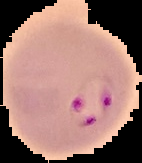

In [4]:
load_img("cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")

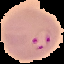

In [6]:
load_img("cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png",target_size=(64,64))

In [7]:
os.environ['KERAS_BACKEND']="tensorflow"
np.random.seed(312)

In [11]:
image_dir="cell_images\\"
size=64
dataset=[]
label=[]

In [20]:
parasitized_img=os.listdir(image_dir + "Parasitized\\")

print(len(parasitized_img))

for i, image_name in enumerate(tqdm(parasitized_img)):
    if (image_name.split('.')[1]=='png'):
        image=cv.imread(image_dir + "Parasitized\\"+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)

13780


  0%|          | 0/13780 [00:00<?, ?it/s]

In [25]:
parasitized_img[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

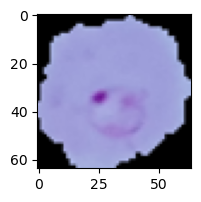

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(dataset[0])

In [26]:
uninfected_img=os.listdir(image_dir + "Uninfected\\")

print(len(uninfected_img))

for i,image_name in enumerate(tqdm(uninfected_img)):
    if (image_name.split('.')[1]=='png'):
        image=cv.imread(image_dir + "Uninfected\\"+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)

13780


  0%|          | 0/13780 [00:00<?, ?it/s]

In [27]:
len(dataset)

41337

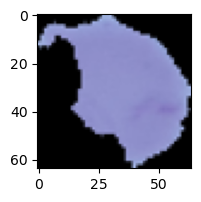

In [29]:
plt.figure(figsize=(2,2))
plt.imshow(dataset[-100])

In [63]:
np.array(label).shape

(41337,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

In [40]:
type(x_train)

list

In [64]:
np.array(x_train).shape

(33069, 64, 64, 3)

In [65]:
np.array(x_test).shape

(8268, 64, 64, 3)

In [66]:
np.array(y_train).shape

(33069, 2)

In [67]:
np.array(y_test).shape

(8268, 2)

### CNN  Model

In [35]:
inpute_shape=(size,size,3)

inp=k.Input(shape=inpute_shape)

conv1=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation='relu')(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation='relu')(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation='sigmoid')(drop4)

In [51]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [52]:
history=model.fit(np.array(x_train),y_train,batch_size=64,verbose=1,epochs=10,validation_split=0.1,shuffle=False)

Epoch 1/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 108s 198ms/step - accuracy: 0.7325 - loss: 0.5830 - val_accuracy: 0.7690 - val_loss: 1.0386
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 98s 210ms/step - accuracy: 0.9145 - loss: 0.2256 - val_accuracy: 0.8896 - val_loss: 0.2743
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 73s 157ms/step - accuracy: 0.9315 - loss: 0.1818 - val_accuracy: 0.9141 - val_loss: 0.2205
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 72s 155ms/step - accuracy: 0.9403 - loss: 0.1589 - val_accuracy: 0.8403 - val_loss: 0.3864
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 75s 161ms/step - accuracy: 0.9451 - loss: 0.1446 - val_accuracy: 0.9050 - val_loss: 0.3261
Epoch 6/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 75s 162ms/step - accuracy: 0.9542 - loss: 0.1236 - val_accuracy: 0.8993 - val_loss: 0.3134
Epoch 7/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - accuracy: 0.9577 - loss: 0.1090 - val_accuracy: 0.9410 - val_loss: 0.1582
Epoch 8/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 75s 162ms/step - accuracy: 0.9629 - loss: 

In [53]:
model.evaluate(np.array(x_test),np.array(y_test))

259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9552 - loss: 0.1407


[0.14612947404384613, 0.954402506351471]

In [56]:
y_test[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [58]:
y_pred=model.predict(np.array(x_test))

259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [60]:
y_pred.shape

(8268, 2)

In [61]:
y_test.shape

(8268, 2)

In [59]:
y_pred[:10]

array([[9.9920970e-01, 8.2338916e-04],
       [9.8930168e-01, 3.0371263e-03],
       [2.5262285e-03, 9.8995465e-01],
       [8.2831800e-01, 2.1300679e-01],
       [7.9848401e-02, 8.4203517e-01],
       [9.9502730e-01, 5.8936193e-03],
       [1.3135119e-03, 9.8822248e-01],
       [9.8513156e-01, 6.1319047e-03],
       [6.7923986e-03, 9.7262245e-01],
       [9.8825938e-01, 2.3461429e-02]], dtype=float32)